In [1]:
import numpy as np
import pickle
import matplotlib.pylab as plt
import seaborn as sns
import colorcet as cc
from openTSNE import TSNE
from pathlib import Path
import sys

sys.path.append('../')

from visualization_utils import *
from utils import *

In [2]:
np.random.seed(113)

In [3]:
data_path = '../data/neuronal_data/'
gmm_path = '../data/ari_neuronal/'
figure_path = 'figures/neuronal/'

In [4]:
df_neurons = pd.read_pickle(Path(data_path, 'df_neuron.pkl'))

In [5]:
n_clusters = 20

In [6]:
latents = np.stack(df_neurons.latent_emb.values)
predictions = np.load(Path(gmm_path, f'best_preds_nc{n_clusters}.npy'))
cluster_means = np.load(Path(gmm_path, f'best_means_nc{n_clusters}.npy'))

In [7]:
df_neurons['GMM_20_best'] = predictions

#### Run and plot t-SNE

In [8]:
tsne = TSNE(
    perplexity=300,
    metric='cosine',
    n_jobs=8,
    random_state=42,
    verbose=False,
)
tsne_emb = tsne.fit(latents)

In [9]:
with open(Path(data_path, 'tsne_embedding.sav'), 'wb') as f:
    pickle.dump(tsne_emb, f)

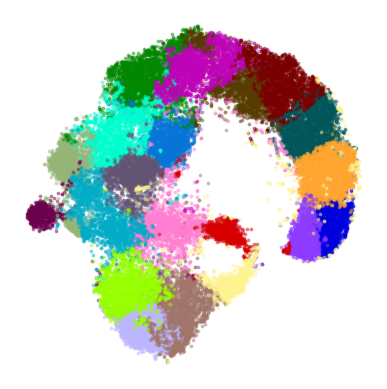

In [10]:
palette = sns.color_palette(cc.glasbey, n_colors=20)
fig, ax = plt.subplots(1, 1)
for i in range(20):
    ax.scatter(
        *tsne_emb[predictions == i].T,
        s=3,
        color=color_dict[i],
        alpha=0.4,
        rasterized=True
    )

ax.axis('off')
ax.set_aspect('equal');

# fig.savefig(f'figures/neuronal/tsne_neuronal.png', dpi=300, transparent=True, bbox_inches='tight')
# plt.close(fig)

#### Plot pairwise 1D histograms

In [11]:
# Retrieve nearest neighbors.
knn_dict = get_knn_dict(cluster_means, k=2)

In [12]:
savepath = 'figures/histograms_neuronal/'

In [13]:
cluster1 = 12
plt_projection_hists(
    cluster1,
    cluster_means,
    latents,
    predictions,
    knn_dict,
    color_dict,
    savepath=Path(savepath, f'cluster_{cluster1}.pdf'),
)
plot_cdf(
    cluster1,
    cluster_means,
    latents,
    predictions,
    knn_dict,
    color_dict,
    savepath=Path(savepath, f'cluster_{cluster1}_cdf.pdf'),
)

cluster1 = 1
plt_projection_hists(
    cluster1,
    cluster_means,
    latents,
    predictions,
    knn_dict,
    color_dict,
    savepath=Path(savepath, f'cluster_{cluster1}.pdf'),
)
plot_cdf(
    cluster1,
    cluster_means,
    latents,
    predictions,
    knn_dict,
    color_dict,
    savepath=Path(savepath, f'cluster_{cluster1}_cdf.pdf'),
)